In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:/hyj/hyj_train.txt',sep='\t',index_col='gene')

In [3]:
df.head()

,label,trans_B73-1-2cm-tassel--yi-,trans_B73-15d-peiru-yi-,trans_B73-15d-pei-yi-,trans_B73-1cm-ear-yi-,trans_B73-2mm-Ear-er-,trans_B73-2mm-tassel-yi-,trans_B73-5mm-ear-er-,trans_B73-6d-root--yi-,trans_B73-baoye-yi-,...,Zm00001d049576,Zm00001d043174,Zm00001d011301,Zm00001d017762,Zm00001d039135,Zm00001d043762,Zm00001d041726,Zm00001d045135,Zm00001d034769,Zm00001d048146
gene,,,,,,,,,,,,,,,,,,,,,
Zm00001d021497,0,0.02,0.00,0.00,0.00,0.00,0.06,0.00,0.12,0.10,...,3,4,4,5,5,4,4,5,4,5
Zm00001d048373,0,0.91,0.42,3.04,1.84,1.76,3.65,2.53,5.38,20.16,...,4,4,4,4,4,4,4,5,4,3
Zm00001d035087,0,140.29,425.42,416.28,230.36,197.38,404.23,293.78,342.85,29.97,...,4,4,4,5,4,4,4,5,4,5
Zm00001d035256,0,18.51,14.09,57.73,58.59,62.68,91.40,71.29,10.23,2.65,...,4,4,4,5,4,3,4,5,3,5
Zm00001d024857,0,20.43,17.84,50.40,53.28,43.01,65.84,53.45,24.09,11.47,...,4,3,3,4,3,2,4,4,4,5


In [ ]:
X=df.drop(['label'],axis=1).values
y=df.label.values

In [6]:
df['label'].value_counts()

0    65
1    51
Name: label, dtype: int64

In [7]:
from sklearn import ensemble,tree,neighbors,linear_model,svm,naive_bayes
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5,random_state=42)

clf={'RandomForest':ensemble.RandomForestClassifier(),
    'AdaBoost':ensemble.AdaBoostClassifier(),
    'KNN':neighbors.KNeighborsClassifier(),
    'LogisticRegression':linear_model.LogisticRegressionCV(),
    'svm':svm.SVC(probability=True),
    'XGBoost':XGBClassifier(),
    'naive_bayes':naive_bayes.GaussianNB(),
    'Bagging':ensemble.BaggingClassifier()}

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'auc':make_scorer(roc_auc_score)
          }

In [8]:
clf_col=['Model Name','Model Parameters','train accuracy_score','test accuracy_score' ,'train precision_score','test precision_score','train recall_score',
        'test recall_score','train f1_score','test f1_score','train auc', 'test auc', 'Model Time']
clf_dataframe = pd.DataFrame(columns = clf_col)
line=0
for model_name,model in clf.items():
    cv_results=model_selection.cross_validate(X=X,y=y,estimator=model,scoring=scoring,cv=cv,return_train_score=True)
    clf_dataframe.loc[line, 'Model Name'] = model_name
    clf_dataframe.loc[line, 'Model Parameters'] = str(model.get_params())
    clf_dataframe.loc[line, 'train accuracy_score'] = cv_results['train_accuracy'].mean()
    clf_dataframe.loc[line, 'test accuracy_score'] = cv_results['test_accuracy'].mean()
    clf_dataframe.loc[line, 'train precision_score'] = cv_results['train_precision'].mean()
    clf_dataframe.loc[line, 'test precision_score'] = cv_results['test_precision'].mean()
    clf_dataframe.loc[line, 'train recall_score'] = cv_results['train_recall'].mean() 
    clf_dataframe.loc[line, 'test recall_score'] = cv_results['test_recall'].mean()
    clf_dataframe.loc[line, 'train f1_score'] = cv_results['train_f1_score'].mean() 
    clf_dataframe.loc[line, 'test f1_score'] = cv_results['test_f1_score'].mean()
    clf_dataframe.loc[line, 'train auc'] = cv_results['train_auc'].mean() 
    clf_dataframe.loc[line, 'test auc'] = cv_results['test_auc'].mean() 
    clf_dataframe.loc[line, 'Model Time'] = cv_results['fit_time'].mean()
    clf_dataframe.loc[line,'fold_auc']=str(cv_results['test_auc'])
    line+=1
clf_dataframe.sort_values(by=['test auc'],ascending=False,inplace=True)

D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The de

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
clf_dataframe

,Model Name,Model Parameters,train accuracy_score,test accuracy_score,train precision_score,test precision_score,train recall_score,test recall_score,train f1_score,test f1_score,train auc,test auc,Model Time,fold_auc
3,LogisticRegression,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.860005,0.776812,0.776763,0.696623,0.960854,0.887273,0.858622,0.776035,0.870811,0.78979,0.466374,[0.66433566 0.87307692 0.84615385 0.84615385 0...
6,naive_bayes,"{'priors': None, 'var_smoothing': 1e-09}",0.795278,0.767391,0.699011,0.687051,0.94122,0.905455,0.80203,0.775758,0.810994,0.783497,0.000609732,[0.74825175 0.84615385 0.84615385 0.83461538 0...
7,Bagging,"{'base_estimator': None, 'bootstrap': True, 'b...",0.984946,0.742029,0.980952,0.690606,0.985366,0.747273,0.983073,0.716364,0.984991,0.742867,0.0163805,[0.66433566 0.64615385 0.92307692 0.82307692 0...
5,XGBoost,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",1,0.733333,1,0.698636,1,0.689091,1,0.689812,1,0.729161,0.0532476,[0.65734266 0.63461538 0.87307692 0.82307692 0...
2,KNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.797475,0.714855,0.733838,0.656667,0.848415,0.803636,0.786274,0.716002,0.803053,0.724895,0.000400209,[0.79370629 0.74615385 0.73461538 0.74615385 0...
0,RandomForest,"{'bootstrap': True, 'class_weight': None, 'cri...",0.989247,0.715942,0.995,0.68654,0.980488,0.670909,0.987654,0.669891,0.988321,0.712378,0.00798621,[0.65034965 0.82307692 0.69615385 0.68461538 0...
1,AdaBoost,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",1,0.69058,1,0.646811,1,0.612727,1,0.624528,1,0.683287,0.0580308,[0.56643357 0.50769231 0.87307692 0.73461538 0...
4,svm,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.997849,0.552536,1,0.566667,0.995122,0.08,0.997531,0.13683,0.997561,0.501538,0.0147569,[0.42307692 0.55 0.51153846 0.55 0...


In [10]:
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(classifier):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Tune Hyperparameter {} ROC'.format(classifier.__class__.__name__))
    plt.title('{} Receiver operating characteristic curve'.format(classifier.__class__.__name__))
    plt.legend(loc="lower right")
    plt.tight_layout()
    #plt.savefig('C:/Users/21013/Desktop/AUC result/8-28/Tune_hp {}.pdf'.format(classifier.__class__.__name__),format='pdf')
    #plt.savefig('C:/Users/21013/Desktop/AUC result/{}.pdf'.format(classifier.__class__.__name__),format='pdf')
    plt.show()
    plt.close()

D:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


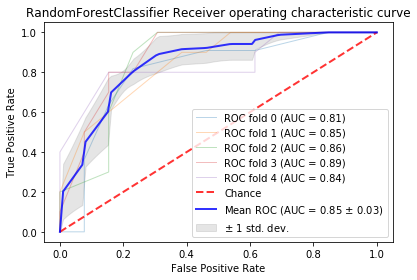

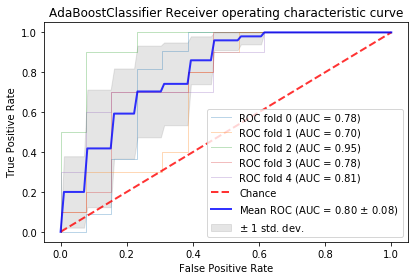

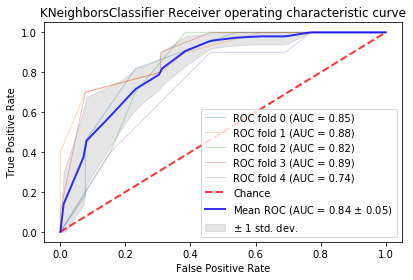

D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

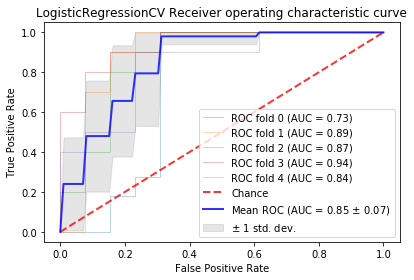

D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default 

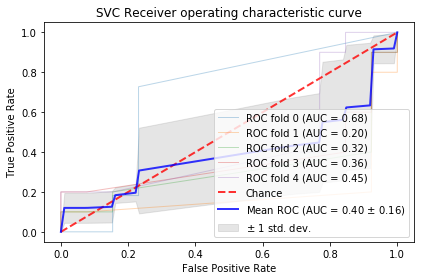

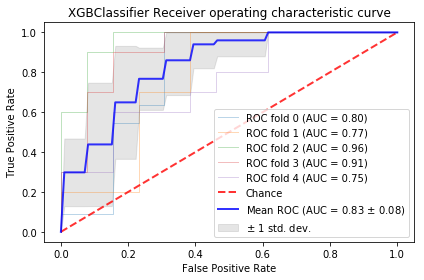

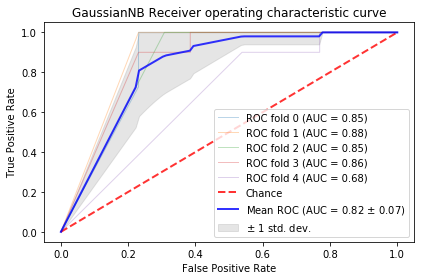

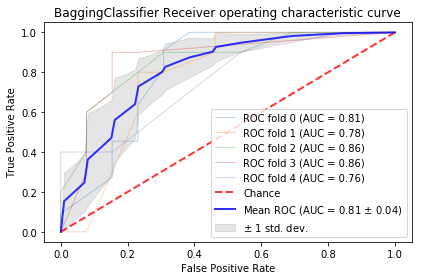

In [11]:
for key,value in clf.items():
    plot_roc_curve(value)

In [12]:
lr_param={'fit_intercept': [True,False], #default: True
                 #'penalty': ['l1','l2'],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
                 'random_state': [0]
         }
knn_param={'n_neighbors': [1,2,3,4,5,6,7], #default: 5
                'weights': ['uniform', 'distance'], #default = ‘uniform’
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
svm_param={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [1,2,3,4,5], #default=1.0
                'gamma': [.1, .25, .5, .75, 1.0], #edfault: auto
                'decision_function_shape': ['ovo', 'ovr'], #default:ovr
                'probability': [True],
                'random_state':[0]
          }
adaboost_param={'n_estimators': [10, 50, 100, 300], #default=50
            'learning_rate': [.01, .03, .05, .1, .25], #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': [0]
            }
bagging_param={'n_estimators': [10, 50, 100, 300], #default=10
            'max_samples':  [.1, .25, .5, .75, 1.0], #default=1.0
            'random_state': [0]
              }
xgb_param={'learning_rate': [.01, .03, .05, .1, .25], #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': [10, 50, 100, 300], 
            'seed': [0] }

lr=linear_model.LogisticRegressionCV()
knn=neighbors.KNeighborsClassifier()
adaboost=ensemble.AdaBoostClassifier()
bagging=ensemble.BaggingClassifier()
xgb=XGBClassifier()
from sklearn.model_selection import GridSearchCV
lr_gs=GridSearchCV(estimator=lr,param_grid=lr_param,cv=cv,scoring='roc_auc',refit=True)
knn_gs=GridSearchCV(estimator=knn,param_grid=knn_param,cv=cv,scoring='roc_auc',refit=True)
svm_gs=GridSearchCV(estimator=svm.SVC(),param_grid=svm_param,cv=cv,scoring='roc_auc',refit=True)
ada_gs=GridSearchCV(estimator=adaboost,param_grid=adaboost_param,cv=cv,scoring='roc_auc',refit=True)
bagging_gs=GridSearchCV(estimator=bagging,param_grid=bagging_param,cv=cv,scoring='roc_auc',refit=True)
xgb_gs=GridSearchCV(estimator=xgb,param_grid=xgb_param,cv=cv,scoring='roc_auc',refit=True)

In [13]:
lr_gs=lr_gs.fit(X,y)
knn_gs=knn_gs.fit(X,y)
svm_gs=svm_gs.fit(X,y)
ada_gs=ada_gs.fit(X,y)
bagging_gs=bagging_gs.fit(X,y)
xgb_gs=xgb_gs.fit(X,y)

D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\s

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which mean

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which mean

In [14]:
Blr=lr_gs.best_estimator_
Bknn=knn_gs.best_estimator_
Bsvm=svm_gs.best_estimator_
Bada=ada_gs.best_estimator_
Bbagging=bagging_gs.best_estimator_
Bxgb=xgb_gs.best_estimator_
best_model=[Blr,Bknn,Bsvm,Bada,Bbagging,Bxgb]

In [21]:
def tune_roc_curve(classifier):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tune Hyperparameter {} ROC'.format(classifier.__class__.__name__))
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig('D:/hyj/figure/Tune_hp {}.pdf'.format(classifier.__class__.__name__),format='pdf')
    #plt.savefig('C:/Users/21013/Desktop/AUC result/{}.pdf'.format(classifier.__class__.__name__),format='pdf')
    plt.show()
    plt.close()

D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\software\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\s

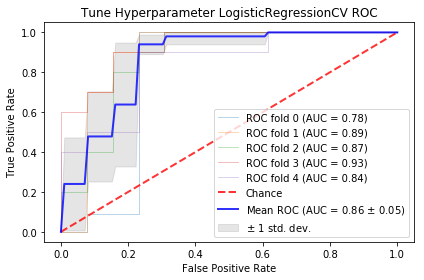

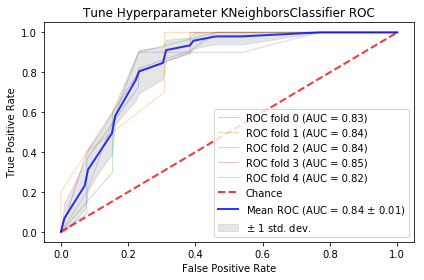

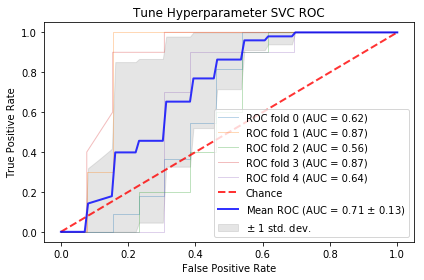

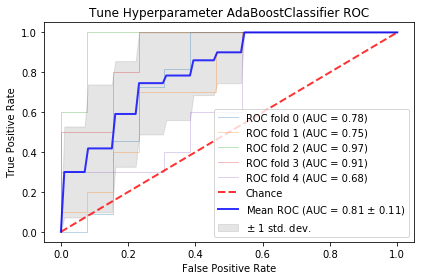

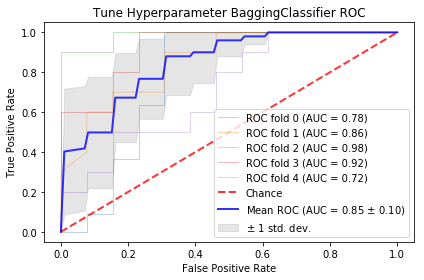

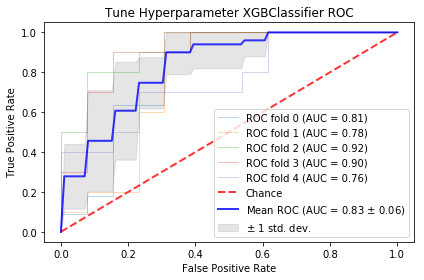

In [22]:
for model in best_model:
    tune_roc_curve(model)

In [17]:
df2=pd.read_csv('D:/hyj/hyj_test.txt',sep='\t',index_col='gene')

In [18]:
df2.head()

,trans_B73-1-2cm-tassel--yi-,trans_B73-15d-peiru-yi-,trans_B73-15d-pei-yi-,trans_B73-1cm-ear-yi-,trans_B73-2mm-Ear-er-,trans_B73-2mm-tassel-yi-,trans_B73-5mm-ear-er-,trans_B73-6d-root--yi-,trans_B73-baoye-yi-,trans_B73-Ear-leaf--yi-,...,Zm00001d049576,Zm00001d043174,Zm00001d011301,Zm00001d017762,Zm00001d039135,Zm00001d043762,Zm00001d041726,Zm00001d045135,Zm00001d034769,Zm00001d048146
gene,,,,,,,,,,,,,,,,,,,,,
Zm00001d025661,0.53,0.38,0.24,1.24,0.53,1.57,2.22,1.12,1.21,0.51,...,6,5,6,6,6,5,6,6,6,7
Zm00001d049223,2.72,7.18,14.90,7.59,6.16,11.91,6.15,7.57,3.40,2.44,...,5,3,4,5,5,3,5,4,4,5
Zm00001d021685,0.00,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.01,...,4,4,5,5,4,4,5,4,4,5
Zm00001d013669,103.24,86.54,125.34,166.28,161.82,241.39,169.07,131.99,44.57,40.40,...,3,3,3,4,3,4,3,5,3,4
Zm00001d037010,19.66,1.19,33.94,55.09,28.11,80.35,44.45,12.30,3.16,1.62,...,4,3,4,4,4,4,4,4,4,5


In [19]:
def pred_ft_gene(clf):
    pred=clf.predict(df2.values)
    pred_pro=clf.predict_proba(df2.values)
    predictions=pd.DataFrame({'label':pred,'ft probability':pred_pro[:,1],'no-ft probility':pred_pro[:,0]}, index = df2.index)
    predictions.sort_values(by=['ft probability'],ascending=False,inplace=True)
    predictions.to_excel('D:/hyj/9-23/{} prediction.xlsx'.format(clf.__class__.__name__))

In [20]:
for model in best_model:
    pred_ft_gene(model)